<p><font size="6" color='grey'> <b>
Python meets ChatGPT
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
Projekt OpenAI API - Einsatz eines bereits erstellten Assistants

---



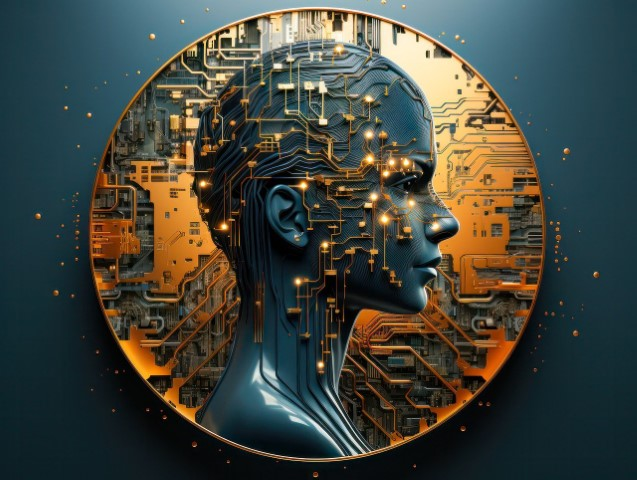
</b></font> </br></p>


---

Bild von <a href="https://pixabay.com/de/users/justdiyteam-10847242/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=8188691">DIY Team</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=8188691">Pixabay</a>

# 1 | Projektauftrag
---

**Ziel:**

Erstellung eines Skripts, mit den ein Thread (zusammenhängende Reihe von Nachrichten) via OpenAI API geführt wird. Der Assistent wurde bereits erstellt.




**Hauptaufgaben:**

+ Erstellung eins Skripts für den Thread.
+ Aufgabe: Diaglog zum Thema Python-Programmierung.
+ Einbindung OpenAI API.
+ Analyse Antwort des ChatBots.

# 2 | Lösungsvorschlag
---

## 2.1 | Prolog

In [ ]:
!pip install -q openai

In [ ]:
# Lesen API Key
from google.colab import userdata
KEY = userdata.get('openai_key')

In [ ]:
# Erstellen eines Clients
import openai
from openai import OpenAI
client = openai.OpenAI(api_key=KEY)

In [ ]:
# Überprüfen, welche Assi im Playground verfügbar ist. Id anpassen
assistant_id = "asst_NcSYRiEJTq9bAYmpTOnhjyjH"

In [ ]:
# Erstellen eines Threads
thread = client.beta.threads.create()

In [ ]:
print(thread.id)

## 2.2 | Erster Prompt

In [ ]:
# Erstellen des 1. Prompts
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Welche Datentypen kennt Python?"
)

In [ ]:
print(message.id)

In [ ]:
# Bearbeiten des 1. Prompts durch ChatGPT
run = client.beta.threads.runs.create_and_poll(
  thread_id=thread.id,
  assistant_id=assistant_id
)

In [ ]:
print(run.id)

In [ ]:
# Analyse der 1. Antwort
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
else:
  print(run.status)

In [ ]:
len(messages.data)

In [ ]:
# Konvertieren in ein Dictionary für bessere Lesbarkei
messages.model_dump()

In [ ]:
# Ausgabe der Message-Bausteine
for r in range(len(messages.data)):
    print("-"*20)
    for index, element in enumerate(messages.data[r]):
        print(f"Run: {r} Index: {index} - {element}")

In [ ]:
# Ausgabe Request & Response
for r in range(len(messages.data)):
    print("-"*20)
    print(f"Run: {r}")
    text_content = messages.data[r].content[0]
    # Zugriff auf den Text
    text = text_content.text.value
    # Ausgabe
    print(text)

## 2.3 | Zweiter Prompt

In [ ]:
# Erstellen des 2. Prompts
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Was ist der Unterschied zwischen einer Liste und einem Tupel?"
)

In [ ]:
print(message.id)

In [ ]:
# Bearbeiten des 2. Prompts durch ChatGPT
run = client.beta.threads.runs.create_and_poll(
  thread_id=thread.id,
  assistant_id=assistant_id
)

In [ ]:
print(run.id)

In [ ]:
# Analyse der 2. Antwort
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
else:
  print(run.status)

In [ ]:
len(messages.data)

In [ ]:
# Ausgabe der Message-Bausteine 1. und 2. Prompt
for r in range(len(messages.data)):
    print("-"*20)
    for index, element in enumerate(messages.data[r]):
        print(f"Run: {r} Index: {index} - {element}")

In [ ]:
# Ausgabe Request & Response aller Prompts
for r in range(len(messages.data)):
    print("-"*20)
    print(f"Run: {r}")
    text_content = messages.data[r].content[0]
    # Zugriff auf den Text
    text = text_content.text.value
    # Ausgabe
    print(text)